In [21]:
import csv
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
CSV_PATH = '../Data/RyanSpeech.en-us.m/all2-5s.phn.csv'  # cesta k vstupnímu CSV souboru
AUDIO_DIR = '../Data/RyanSpeech.en-us.m/wavs'  # cesta k adresáři se zvukovými soubory

In [23]:
# Funkce pro převod délky z sekund na formát hh:mm:ss
def format_time(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Funkce na získání délky zvukového souboru v sekundách pomocí librosa
def get_audio_length(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Načtení zvuku s původní vzorkovací frekvencí
    duration = librosa.get_duration(y=y, sr=sr)
    return duration

# Funkce pro filtrování řádků podle délky zvukového souboru a výpočet celkových délek
def analyze_audio_files(csv_path, audio_directory):
    tot_len = 0  # Celková délka všech původních zvukových souborů
    files = []  # Seznam vstupních souborů s délkou

    with open(csv_path, newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile, delimiter='|')

        for row in tqdm(reader):
            fname = row[0]  # Název souboru je první položka v řádce

            # Přidání přípony .wav, pokud tam není
            if not fname.lower().endswith('.wav'):
                fname += '.wav'
            
            audio_file_path = os.path.join(audio_directory, fname)
            
            try:
                length = get_audio_length(audio_file_path)
                tot_len += length  # Přičti k celkové délce původních souborů
                files.append((fname, length))  # Přidej soubor a jeho délku do seznamu
            except FileNotFoundError:
                print(f'[!] {audio_file_path} does not exist')
    
    return tot_len, files

In [24]:
# Analýza audio souborů
tot_len, files = analyze_audio_files(CSV_PATH, AUDIO_DIR)

# Výpočty statistik
input_lengths = [length for _, length in files]
avg_input_length = np.mean(input_lengths) if input_lengths else 0
median_input_length = np.median(input_lengths) if input_lengths else 0

print(f"Celkový počet audiosouborů:  {len(files)}")
print(f"Celková délka audiosouborů:  {format_time(tot_len)}")
print(f"Průměrná délka audiosouborů: {avg_input_length:.2f}")
print(f"Medián délky audiosouborů:  {median_input_length:.2f}")

6256it [02:21, 44.33it/s]

Celkový počet audiosouborů:  6256
Celková délka audiosouborů:  05:33:19
Průměrná délka audiosouborů: 3.20
Medián délky audiosouborů:  3.06


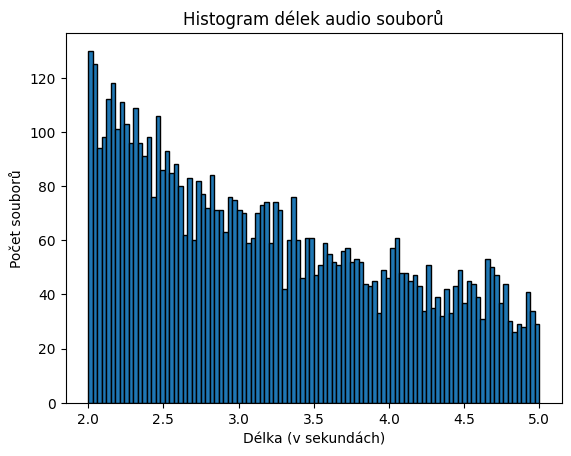

In [25]:
# Vytvoření histogramu délek výstupních souborů
if input_lengths:
    plt.hist(input_lengths, bins=100, edgecolor='black')
    plt.title('Histogram délek audio souborů')
    plt.xlabel('Délka (v sekundách)')
    plt.ylabel('Počet souborů')
    plt.show()